In [ ]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense,MaxPooling2D,BatchNormalization
from keras.models import load_model

In [2]:
train_data_dir='data'
batch_size=32

train_datagen = image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
def generate(subset='training', data_dir='data', shuffle=False, target_size=(24,24), color_mode='grayscale', class_mode='categorical'):
  return train_datagen.flow_from_directory(data_dir, batch_size=batch_size, target_size=target_size, color_mode=color_mode, class_mode=class_mode, shuffle=shuffle, subset=subset)
train_data = generate(subset='training', shuffle=True)
validation_data = generate(subset='validation')

steps_per_epoch = len(train_data.classes) // batch_size
validation_steps= len(validation_data.classes) // batch_size
print(f"steps_per_epoch {steps_per_epoch}, validation_steps {validation_steps}")

Found 38400 images belonging to 2 classes.
Found 9600 images belonging to 2 classes.
steps_per_epoch 1200, validation_steps 300


In [3]:
def CNN():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
        MaxPooling2D(pool_size=(2,2),strides=1),
        Conv2D(32,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2),strides=1),
 
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2,2), strides=1),

        Dropout(0.25),
   
        Flatten(),
    
        Dense(128, activation='relu'),
    
        Dropout(0.5),
    
        Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
    return model

In [4]:
CNN().model.summary()
model = CNN()

2022-04-22 21:22:24.293387: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-22 21:22:24.294032: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.
/Users/skywrace/opt/anaconda3/envs/capstone-design-two/lib/python3.7/site-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)       

In [5]:
history=model.fit(train_data, validation_data=validation_data, epochs=15, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/15
1200/1200 [==============================] - 76s 64ms/step - loss: 0.1265 - accuracy: 0.9526 - val_loss: 0.3496 - val_accuracy: 0.9536
Epoch 2/15
1200/1200 [==============================] - 74s 61ms/step - loss: 0.0477 - accuracy: 0.9847 - val_loss: 0.1838 - val_accuracy: 0.9586
Epoch 3/15
1200/1200 [==============================] - 73s 61ms/step - loss: 0.0377 - accuracy: 0.9877 - val_loss: 0.0046 - val_accuracy: 0.9501
Epoch 4/15
1200/1200 [==============================] - 72s 60ms/step - loss: 0.0339 - accuracy: 0.9885 - val_loss: 0.0743 - val_accuracy: 0.9692
Epoch 5/15
1200/1200 [==============================] - 74s 62ms/step - loss: 0.0274 - accuracy: 0.9910 - val_loss: 0.0279 - val_accuracy: 0.9534
Epoch 6/15
1200/1200 [==============================] - 75s 63ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0894 - val_accuracy: 0.9479
Epoch 7/15
1200/1200 [==============================] - 76s 63ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.4359 -

Text(0.5, 0, 'epoch')

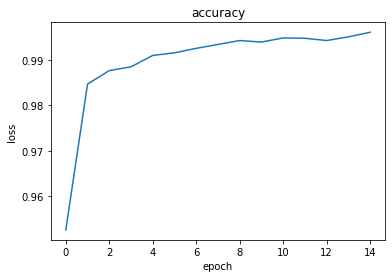

In [6]:
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

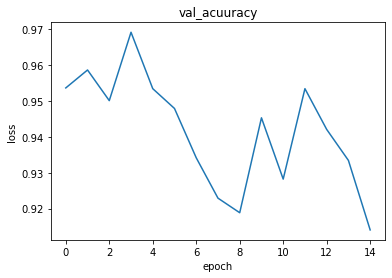

In [7]:
plt.plot(history.history['val_accuracy'])
plt.title('val_acuuracy')
plt.ylabel('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

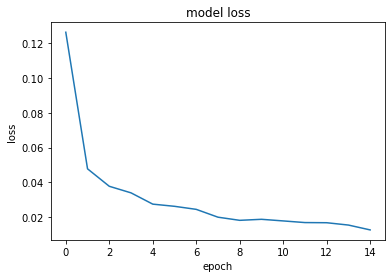

In [8]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

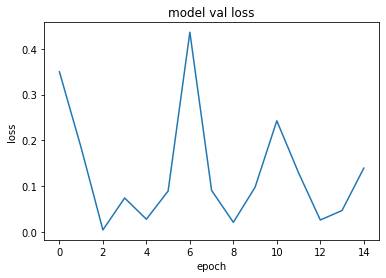

In [9]:
plt.plot(history.history['val_loss'])
plt.title('model val loss')
plt.ylabel('loss')
plt.xlabel('epoch')

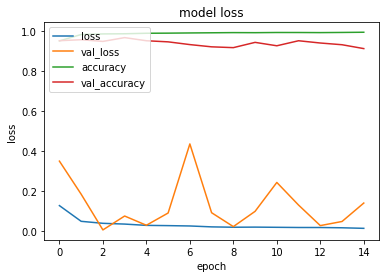

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'], loc='upper left')
plt.show()

In [1]:
model.save('model/weight.h5', overwrite=True)

NameError: name 'model' is not defined